<a href="https://colab.research.google.com/github/haithemml/Machine-Learning-with-Python/blob/master/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #Standarized the data
from sklearn.model_selection import train_test_split #splitting data arrays into two subsets. for training data and for testing data

In [2]:
#developing and evaluating deep learning models
from keras import backend as k 
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

In [3]:
df_train = pd.read_csv('data.csv', index_col=0)
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df_train['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 24.790933
Kurtosis : 1044.352151


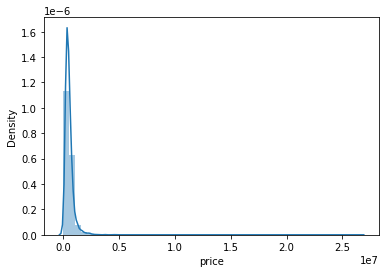

In [4]:
sns.distplot(df_train['price']);
print('Skewness : %f'% df_train["price"].skew())
print('Kurtosis : %f'% df_train["price"].kurt())

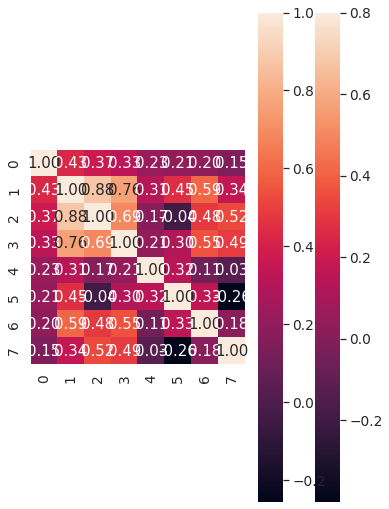

In [14]:
#describe the linear relationship between variables
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (6, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
K = 8
cols = corrmat.nlargest(K, "price") ["price"].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set (font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt= '.2f')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


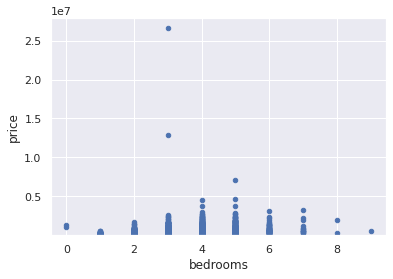

In [30]:
var = 'bedrooms'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x = var, y = 'price', ylim=(0.700000))

In [32]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
df_train = df_train[cols]
#create dummies values
df_train = pd.get_dummies(df_train)
#standard scale the data before using neural network
scale = StandardScaler()
X_train = df_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
X_train = scale.fit_transform(X_train)
#y = price column
y = df_train['price'].values
seed = 5
#spleet into 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.2, random_state=seed)

In [33]:
#create and compile model
def create_model():
  model = Sequential()
  model.add(Dense(10, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=[metrics.mae])
  return model


In [35]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=90, batch_size=32)

Epoch 1/90
115/115 [==============================] - 1s 4ms/step - loss: 677603442688.0000 - mean_absolute_error: 557009.9375 - val_loss: 402075418624.0000 - val_mean_absolute_error: 531752.4375
Epoch 2/90
115/115 [==============================] - 0s 2ms/step - loss: 677498126336.0000 - mean_absolute_error: 556932.2500 - val_loss: 401807114240.0000 - val_mean_absolute_error: 531545.9375
Epoch 3/90
115/115 [==============================] - 0s 2ms/step - loss: 676709793792.0000 - mean_absolute_error: 556347.2500 - val_loss: 400390160384.0000 - val_mean_absolute_error: 530478.6250
Epoch 4/90
115/115 [==============================] - 0s 2ms/step - loss: 673755693056.0000 - mean_absolute_error: 554222.6250 - val_loss: 396002983936.0000 - val_mean_absolute_error: 527264.5625
Epoch 5/90
115/115 [==============================] - 0s 2ms/step - loss: 666320896000.0000 - mean_absolute_error: 548941.5000 - val_loss: 386239856640.0000 - val_mean_absolute_error: 520126.0938
Epoch 6/90
115/115 [

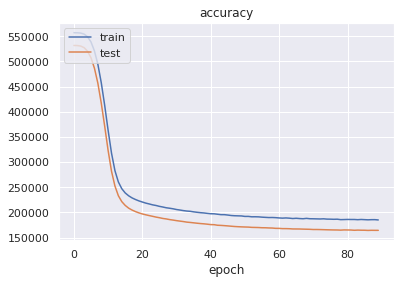

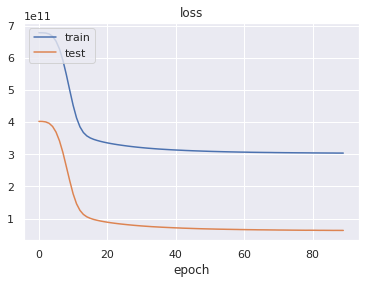

In [36]:
#summarize history for accuracy and loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()